In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [2]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [4]:
mask_path = "../dataset/cat_and_dog_dataset/SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in '../dataset/cat_and_dog_dataset/SegmentationClass'...
['dog_184.png', 'cat_29.png', 'cat.629.png', 'cat.615.png', 'cat.601.png', 'dog.615.png', 'dog.601.png', 'dog.629.png', 'dog.359.png', 'dog.358.png', 'dog.364.png', 'cat.402.png', 'cat.370.png', 'cat.358.png', 'dog.628.png', 'dog.600.png', 'dog.614.png', 'cat.600.png', 'cat.614.png', 'cat.628.png', 'cat_191.png', 'cat_178.png', 'dog_187.png', 'dog_10.png', 'cat_16.png', 'cat.602.png', 'cat.616.png', 'dog.602.png', 'dog.616.png', 'dog.428.png', 'dog.367.png', 'cat.415.png', 'cat.367.png', 'dog_227.png', 'dog.617.png', 'dog.603.png', 'cat.617.png', 'cat.603.png', 'dog_179.png', 'cat.561.png', 'cat_179.png', 'cat.565.png', 'dog_29.png', 'dog_9.png', 'cat.607.png', 'cat.613.png', 'dog.607.png', 'dog.613.png', 'cat.389.png', 'dog.362.png', 'dog.612.png', 'cat.612.png', 'cat.606.png', 'dog_8.png', 'cat_12.png', 'dog_28.png', 'cat_183.png', 'cat_154.png', 'cat_181.png', 'cat_38.png', 'cat_10.png', 'cat.610.png', 'cat.604.

Finding unique colors: 100%|██████████| 305/305 [00:34<00:00,  8.80it/s]


Scan complete!
Found 3 unique classes.


{(0, 0, 0): 0, (0, 128, 0): 1, (128, 0, 0): 2}

In [5]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale




In [9]:

# Function to encode mask to grayscale
def encode_mask_to_grayscale(mask_path, color_to_label):
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape

    grayscale_mask = np.zeros((height, width), dtype=np.uint8)

    # Map RGB colors to class labels
    for color, label in color_to_label.items():
        r, g, b = color
        matches = np.all(mask_rgb == [r, g, b], axis=-1)
        grayscale_mask[matches] = label

    return grayscale_mask

# Paths
input_dir = "../dataset/cat_and_dog_dataset/SegmentationClass"
output_dir = "../dataset/cat_and_dog_dataset/encoded_masks"

# Create output folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all PNG files
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        mask_path = os.path.join(input_dir, filename)
        grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

        # Save grayscale mask
        save_path = os.path.join(output_dir, filename)
        cv2.imwrite(save_path, grayscale_label_mask)

        print(f"Processed and saved: {save_path}")

Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog_184.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/cat_29.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/cat.629.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/cat.615.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/cat.601.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog.615.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog.601.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog.629.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog.359.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog.358.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/dog.364.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks/cat.402.png
Processed and saved: ../dataset/cat_and_dog_dataset/encoded_masks

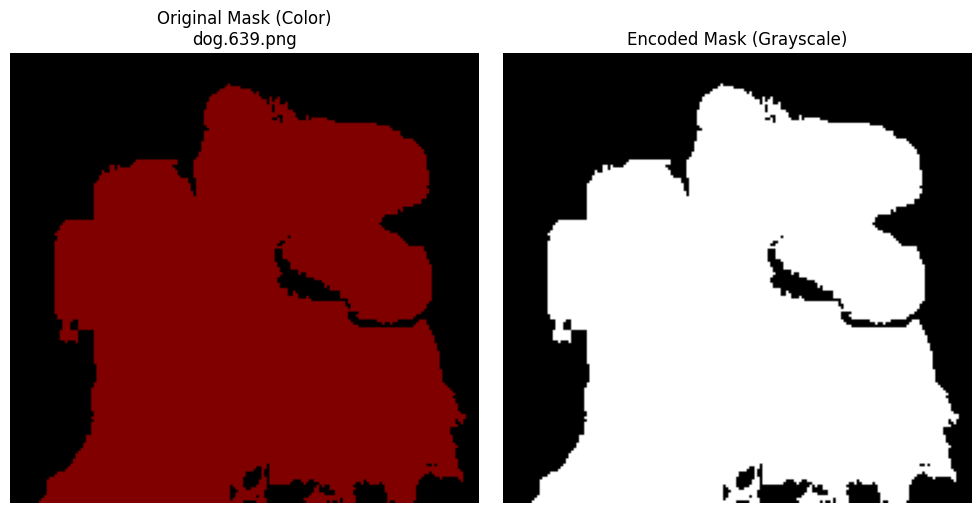

In [30]:
# Visualize a random sample
import random
import matplotlib.pyplot as plt

# Pick a random sample from processed masks
sample_filename = random.choice(os.listdir(output_dir))  # random file
original_path = os.path.join(input_dir, sample_filename)
encoded_path = os.path.join(output_dir, sample_filename)

# Read images
original_mask = cv2.imread(original_path)
original_mask_rgb = cv2.cvtColor(original_mask, cv2.COLOR_BGR2RGB)
encoded_mask = cv2.imread(encoded_path, cv2.IMREAD_GRAYSCALE)

# Plot both
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_mask_rgb)
plt.title(f"Original Mask (Color)\n{sample_filename}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(encoded_mask, cmap="gray")
plt.title("Encoded Mask (Grayscale)")
plt.axis("off")

plt.tight_layout()
plt.show()